In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LS
from sklearn.metrics import mean_squared_error as mse

In [223]:
data=pd.read_csv("https://raw.githubusercontent.com/stellahrotich/MLProjects101/master/BlackFriday.csv")

In [224]:
(data.isnull().mean())*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

In [225]:
data.drop(['Product_Category_3','User_ID','Product_ID'],axis=1,inplace=True)

In [226]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [227]:
data.Product_Category_2.fillna(0,inplace=True)

In [228]:
data.Product_Category_2.isnull().sum()

0

In [229]:
data.Product_Category_2.value_counts()

0.0     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64

<H6>
HYPOTHESIS TESTING:  AGE VS PURCHASE
    <H6>

In [230]:
data.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [231]:
data.Age.replace(['46-50','51-55','55+','0-17','18-25'],['46+','46+','46+','<25','<25'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

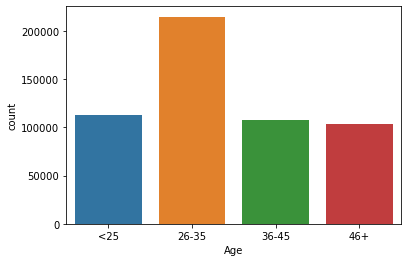

In [232]:
sns.countplot(data.Age,order=['<25','26-35','36-45','46+'])

In [233]:
part1=data.Purchase[data.Age=="<25"]
part2=data.Purchase[data.Age=="26-35"]
part3=data.Purchase[data.Age=="36-45"]
part4=data.Purchase[data.Age=="46+"]
stats.f_oneway(part1,part2,part3,part4)

F_onewayResult(statistic=48.0693307828862, pvalue=4.722692721784603e-31)

<H6>
PRODUCT CATEGORY VS PURCHASE
<H6>

In [234]:
data.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [235]:
part1=data.Purchase[data.Product_Category_1==5]
part2=data.Purchase[data.Product_Category_1==1]
part3=data.Purchase[data.Product_Category_1==8]
part4=data.Purchase[data.Product_Category_1==11]
part5=data.Purchase[data.Product_Category_1==2]
part6=data.Purchase[data.Product_Category_1==6]
part7=data.Purchase[data.Product_Category_1==3]
part8=data.Purchase[data.Product_Category_1==4]
part9=data.Purchase[data.Product_Category_1==16]
part10=data.Purchase[data.Product_Category_1==15]
part11=data.Purchase[data.Product_Category_1==13]
part12=data.Purchase[data.Product_Category_1==10]
part13=data.Purchase[data.Product_Category_1==12]
part14=data.Purchase[data.Product_Category_1==7]
part15=data.Purchase[data.Product_Category_1==18]
part16=data.Purchase[data.Product_Category_1==14]
part17=data.Purchase[data.Product_Category_1==17]
part18=data.Purchase[data.Product_Category_1==9]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17,part18)

F_onewayResult(statistic=53264.94993931252, pvalue=0.0)

<H6>
HYPOTHESIS TESTING OCCUPATION
<H6>

In [236]:
data.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [237]:
data.Occupation.describe()

count    537577.00000
mean          8.08271
std           6.52412
min           0.00000
25%           2.00000
50%           7.00000
75%          14.00000
max          20.00000
Name: Occupation, dtype: float64

In [238]:
data.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

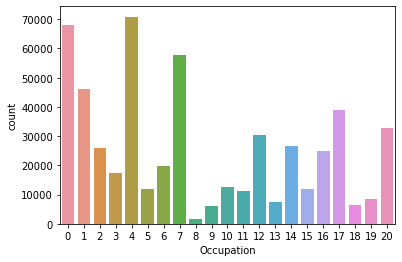

In [239]:
sns.countplot(data.Occupation)

In [240]:
part1=data.Purchase[data.Occupation==10]
part2=data.Purchase[data.Occupation==16]
part3=data.Purchase[data.Occupation==15]
part4=data.Purchase[data.Occupation==7]
part5=data.Purchase[data.Occupation==20]
part6=data.Purchase[data.Occupation==9]
part7=data.Purchase[data.Occupation==1]
part8=data.Purchase[data.Occupation==12]
part9=data.Purchase[data.Occupation==17]
part10=data.Purchase[data.Occupation==0]
part11=data.Purchase[data.Occupation==3]
part12=data.Purchase[data.Occupation==4]
part13=data.Purchase[data.Occupation==11]
part14=data.Purchase[data.Occupation==8]
part15=data.Purchase[data.Occupation==19]
part16=data.Purchase[data.Occupation==2]
part17=data.Purchase[data.Occupation==18]
part18=data.Purchase[data.Occupation==5]
part19=data.Purchase[data.Occupation==14]
part20=data.Purchase[data.Occupation==13]
part21=data.Purchase[data.Occupation==6]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17,part18,part19,part20,part21)

F_onewayResult(statistic=102.94170052700193, pvalue=0.0)

<H6>
HYPOTHESIS TESTING MARITAL STATUS
<H6>

In [241]:
data.Marital_Status.describe()

count    537577.000000
mean          0.408797
std           0.491612
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

In [242]:
data.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

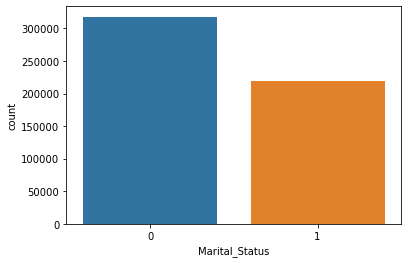

In [243]:
sns.countplot(data.Marital_Status)

In [244]:
part1=data.Purchase[data.Marital_Status==0]
part2=data.Purchase[data.Marital_Status==1]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=0.008948303078011218, pvalue=0.9246361830127376)

<H6>
HYPOTHESIS TESTING
<H6>

In [245]:
data.Gender.describe()

count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

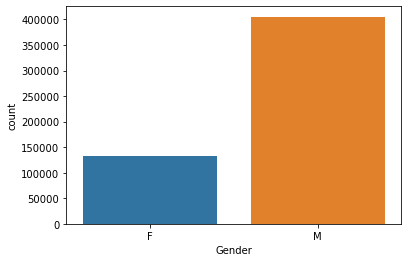

In [246]:
sns.countplot(x="Gender",data=data)

In [247]:
gen1=data.Purchase[data.Gender=="F"]
gen2=data.Purchase[data.Gender=="M"]
stats.f_oneway(gen1,gen2)

F_onewayResult(statistic=1947.8649419367853, pvalue=0.0)

<H6>
HYPOTHESIS TESTING CITY
<H6>

In [248]:
data.Stay_In_Current_City_Years.describe()

count     537577
unique         5
top            1
freq      189192
Name: Stay_In_Current_City_Years, dtype: object

In [249]:
data.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

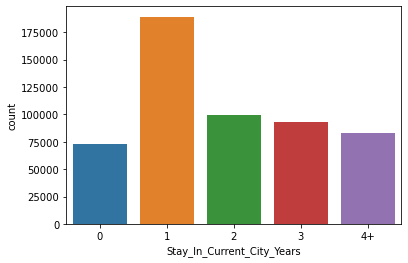

In [250]:
sns.countplot(x="Stay_In_Current_City_Years",data=data,order=["0","1","2","3","4+"])

In [251]:
N1=data.Purchase[data.Stay_In_Current_City_Years=="0"]
N2=data.Purchase[data.Stay_In_Current_City_Years=="1"]
N3=data.Purchase[data.Stay_In_Current_City_Years=="2"]
N4=data.Purchase[data.Stay_In_Current_City_Years=="3"]
N5=data.Purchase[data.Stay_In_Current_City_Years=="4+"]
stats.f_oneway(N1,N2,N3,N4,N5)

F_onewayResult(statistic=10.341978242037824, pvalue=2.256961231688002e-08)

In [252]:
data.Product_Category_2.fillna('0',inplace=True)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

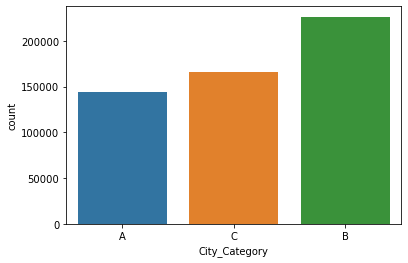

In [253]:
sns.countplot(x="City_Category",data=data)

In [254]:
part1=data.Purchase[data.City_Category=='A']
part2=data.Purchase[data.City_Category=='B']
part3=data.Purchase[data.City_Category=='C']
stats.f_oneway(part1,part2,part3)

F_onewayResult(statistic=1376.6587765751206, pvalue=0.0)

In [255]:
data.Product_Category_2.value_counts()

0.0     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64

In [256]:
part1=data.Purchase[data.Product_Category_2==8.0]
part2=data.Purchase[data.Product_Category_2==14.0]
part3=data.Purchase[data.Product_Category_2==2.0]
part4=data.Purchase[data.Product_Category_2==16.0]
part5=data.Purchase[data.Product_Category_2==15.0]
part6=data.Purchase[data.Product_Category_2==5.0]
part7=data.Purchase[data.Product_Category_2==4.0]
part8=data.Purchase[data.Product_Category_2==6.0]
part9=data.Purchase[data.Product_Category_2==11.0]
part10=data.Purchase[data.Product_Category_2==17.0]
part11=data.Purchase[data.Product_Category_2==13.0]
part12=data.Purchase[data.Product_Category_2==9.0]
part13=data.Purchase[data.Product_Category_2==12.0]
part14=data.Purchase[data.Product_Category_2==10.0]
part15=data.Purchase[data.Product_Category_2==3.0]
part16=data.Purchase[data.Product_Category_2==18.0]
part17=data.Purchase[data.Product_Category_2==7.0]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17)

F_onewayResult(statistic=3727.5259855080876, pvalue=0.0)

In [257]:
y=data.Purchase

In [259]:
x=data.drop(['Marital_Status','City_Category','Gender','Age','Stay_In_Current_City_Years','Purchase','Product_Category_2'],axis=True)

In [260]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [261]:
train_x.shape

(430061, 2)

In [262]:
test_x.shape

(107516, 2)

In [263]:
model=LS().fit(train_x,train_y)

In [267]:
model.score(test_x,test_y)

0.09918097061904463